In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import pickle
import json
import joblib

**I.Data**

In [3]:
data = pd.read_csv("Spam-Email-raw-text-for-NLP.csv")
data

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [4]:
data[data["MESSAGE"].str[0] == "Q"]

,CATEGORY,MESSAGE,FILE_NAME
2273,0,Quoting Brendan Kehoe (brendan@zen.org):\n\n\n...,00150.a4c5a8aaccd6b54f1000e9fa02f53114
2674,0,Quoting kevin lyda (kevin+dated+1031593647.e87...,00252.18ef1111d1d7543890e6b0a7eb13e014
3266,0,Quoting Waider (waider@waider.ie):\n\n\n\n> Ni...,00249.5123280972d4935e630a46f92266f6c8
4064,0,Quite independently from testing and tuning th...,01641.af4f10c1dad2aea2637aa8cd093adc34
4214,0,"Quoting Breathnach, Proinnsias (Dublin) (breat...",00272.c319ce83bd9b379fda60a7991da1b9d5
4216,0,Quoting Paul Linehan (plinehan@yahoo.com):\n\n...,00274.ecbd86ce57edcb6a419a92479216e43c
4494,0,Quoting jac1 (jac1@student.cs.ucc.ie):\n\n\n\n...,00195.6120b0cdf8f72c45ebaf0d81c28ee457
4609,0,Quoting Nick Murtagh (nickm@go2.ie):\n\n\n\n> ...,00351.e08898f91941c9c27c93c339054148de
4679,0,Quoting John P. Looney (valen@tuatha.org):\n\n...,00355.a42b7b791419c4d5a33b9cefda4fe2b7
4711,0,Quoting Kenn Humborg (kenn@bluetree.ie):\n\n\n...,00347.345d2c25c6e5e7255b8f53291ff8ed9d


In [5]:
data["MESSAGE"][5678]

'Quoting Paul Linehan (plinehan@yahoo.com):\n\n\n\n> I\'m confused. I thought it was GPL\'ed and that the money you paid SuSE\n\n> was for your 60 day support or whatever? \n\n\n\nYes, you\'re confused.\n\n\n\nA Linux distribution (_any_ Linux distribution) contains lots and lots\n\nof separate codebases.  Some are under the GNU GPL.  Many are not.  Are\n\nyou clear on this point, now?  This is my second try.  One suspects that\n\nyou actually understand perfectly, but just don\'t like it.\n\n\n\nYou\'re further confused if you think the GNU GPL gives you the right to\n\nget covered software for free.  It does not.  It provides that _if_\n\nyou\'ve lawfully received a copy of the covered binary version, you have\n\nrights to also receive the matching source code.\n\n\n\n> I don\'t particularly need support, so I\'m not really interested in\n\n> purchasing a set of disks with 4 billion apps which I\'ll never use.\n\n\n\nThen, if you nonetheless want a SuSE boxed set\'s contents, the onl

**II.Clean data**

In [6]:
data.describe()

,CATEGORY
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [8]:
data.isna().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

In [9]:
data.shape

(5796, 3)

In [10]:
data.tail()

,CATEGORY,MESSAGE,FILE_NAME
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0
5795,0,"If you run Pick, and then use the ""New FTOC"" b...",00747.352d424267d36975a7b40b85ffd0885e


In [11]:
data["CATEGORY"].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

*1.Lọc từ*

In [12]:
#need run
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

In [13]:
#Lọc các từ trong 1 câu, chuyển về viết thường, đưa về dạng từ gốc và xóa các từ là stopword
#need run
def message_to_token_list(s):
    tokens = tokenizer.tokenize(s)
    lowercased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]
    return useful_tokens
    

In [14]:
#Chia data, train 80, test 20
#need run
data = data.sample(frac=1, random_state=1)
data = data.reset_index(drop=True)
split_index = int(len(data) * 0.8)
train_data, test_data = data[:split_index], data[split_index:]
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [15]:
#Đếm số lần xuất hiện của từng từ nếu label = 1
token_counter={}
for i in range(len(train_data)):
    if train_data['CATEGORY'][i] == 1:
            message_as_token_lst = message_to_token_list(train_data['MESSAGE'][i])
            for token in message_as_token_lst:
                if token in token_counter:
                    token_counter[token] += 1
                else:
                    token_counter[token] = 1

In [16]:
token_counter

{'html': 3229,
 'font': 34494,
 'back': 568,
 'ffffff': 2473,
 'style': 3178,
 'background': 696,
 'color': 9532,
 'size': 12758,
 '3': 2517,
 'ptsize': 450,
 '12': 489,
 'b': 12540,
 'viagra': 63,
 '000000': 1891,
 '2': 5844,
 '10': 1256,
 'family': 1282,
 'sansserif': 314,
 'face': 9738,
 'arial': 6134,
 'lang': 396,
 '0': 6633,
 'br': 15828,
 'breakthrough': 16,
 'medication': 49,
 'impotence': 12,
 'delivered': 23,
 'mailbox': 22,
 'without': 279,
 'leaving': 13,
 'computer': 325,
 'simply': 269,
 'click': 1780,
 'href': 3775,
 'http': 8453,
 'host': 39,
 '1bulk': 12,
 'email': 2995,
 'software': 618,
 'com': 6530,
 'ch4': 12,
 'pharm': 12,
 'blue': 134,
 'le': 389,
 '5': 2093,
 'minute': 263,
 'complete': 323,
 'line': 496,
 'consultation': 58,
 'many': 408,
 'case': 197,
 '24': 346,
 'nbsp': 9601,
 'hour': 437,
 'gt': 102,
 'website': 392,
 'treatment': 14,
 'compromised': 3,
 'sexual': 99,
 'function': 64,
 'convenient': 28,
 'affordable': 52,
 'confidential': 112,
 'ship': 28,


In [17]:
#Giữ lại những từ có số lần xuất hiện lớn hơn 3000
def keep_token(proccessed_token, threshold):
  if proccessed_token not in token_counter:
    return False
  else:
    return token_counter[proccessed_token] > threshold

In [18]:
features = set()
for token in token_counter:
  if keep_token(token, 3000):
    features.add(token)
features = list(features)
token_to_index_mapping = {t:i for t, i in zip(features, range(len(features)))}
token_to_index_mapping


{'table': 0,
 'style': 1,
 '2': 2,
 'td': 3,
 'verdana': 4,
 'face': 5,
 'serif': 6,
 'nbsp': 7,
 'br': 8,
 'width': 9,
 'www': 10,
 'p': 11,
 'helvetica': 12,
 'html': 13,
 'font': 14,
 'tr': 15,
 '3e': 16,
 'href': 17,
 'com': 18,
 'b': 19,
 'size': 20,
 '1': 21,
 '20': 22,
 '0': 23,
 'arial': 24,
 'center': 25,
 'u': 26,
 'height': 27,
 'border': 28,
 'align': 29,
 '3d': 30,
 'http': 31,
 'color': 32}

In [19]:
# joblib.dump(features, 'list_feature.sav')

['list_feature.sav']

In [20]:
#need run
features = joblib.load('list_feature.sav')

In [21]:
# json_string = json.dumps(token_to_index_mapping, indent = 1)
# with open("my_data.json", "w") as f:
#     f.write(json_string)

In [22]:
#need run
with open("my_data.json", "r") as f:
    token_to_index_mapping = json.loads(f.read())

*2.Chuyển từ dạng văn bản sang dạng ma trận*

In [23]:
#Chuyển 1 câu từ dạng văn bản sang array
#need run
def message_to_count_vector(message):
  count_vector = np.zeros(len(features))

  processed_list_of_tokens = message_to_token_list(message)

  for token in processed_list_of_tokens:
    if token not in features:
      continue
    index = token_to_index_mapping[token]
    count_vector[index] += 1
  
  return count_vector

In [24]:
#Chuyển từ dạng dataframe sang dạng ma trận
def df_to_X_y(df):
  y = df['CATEGORY'].to_numpy().astype(int)

  message_col = df['MESSAGE']
  count_vectors = []

  for message in message_col:
    count_vector = message_to_count_vector(message)
    count_vectors.append(count_vector)

  X = np.array(count_vectors).astype(int)

  return X, y

In [25]:
x_train, y_train = df_to_X_y(train_data)

x_test, y_test = df_to_X_y(test_data)

In [26]:
model = MinMaxScaler().fit(x_train)

In [27]:
x_train = model.transform(x_train)
x_test = model.transform(x_test)

**III.Training model**

In [28]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


**1.Support vector machine**

*1.1.Data*

In [29]:
x_train_svm = x_train.copy()
x_test_svm = x_test.copy()
y_train_svm = y_train.copy()
y_test_svm = y_test.copy()

In [30]:
len(y_test_svm[y_test_svm == 0])

788

*1.2.Training model*

In [31]:
spvc1 = SGDClassifier(verbose = 1, early_stopping = True)
spvc1.fit(x_train_svm, y_train_svm)

-- Epoch 1
Norm: 22.93, NNZs: 33, Bias: -1.061768, T: 4172, Avg. loss: 0.820396
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 22.41, NNZs: 33, Bias: -1.045911, T: 8344, Avg. loss: 0.537437
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 22.76, NNZs: 33, Bias: -0.320213, T: 12516, Avg. loss: 0.460354
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 22.43, NNZs: 33, Bias: -0.502683, T: 16688, Avg. loss: 0.421206
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 22.43, NNZs: 33, Bias: -1.065120, T: 20860, Avg. loss: 0.400891
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 22.50, NNZs: 33, Bias: -1.067777, T: 25032, Avg. loss: 0.383450
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds


SGDClassifier(early_stopping=True, verbose=1)

In [32]:
# file_name_model = "SVM_for_email_spam1.pickle"
# pickle.dump(spvc1, open(file_name_model, "wb"))

In [33]:
#need run
spvc1 = pickle.load(open("SVM_for_email_spam1.pickle", "rb"))

In [34]:
spvc1.n_iter_

6

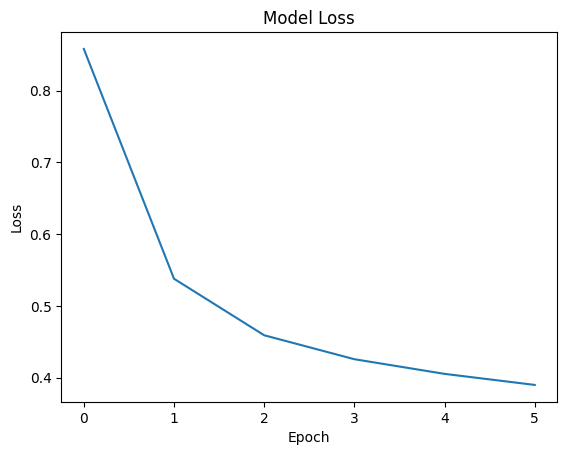

In [35]:
loss_val = np.array([0.858379, 0.537890, 0.459067, 0.425672, 0.405226, 0.389813])
epoch_lst = np.arange(6)
plt.plot(epoch_lst, loss_val)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.show()

In [36]:
print(classification_report(y_test_svm, spvc1.predict(x_test_svm)))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       788
           1       0.98      0.47      0.63       372

    accuracy                           0.82      1160
   macro avg       0.89      0.73      0.76      1160
weighted avg       0.86      0.82      0.80      1160



In [37]:
print(classification_report(y_train_svm, spvc1.predict(x_train_svm)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3112
           1       0.98      0.49      0.65      1524

    accuracy                           0.83      4636
   macro avg       0.89      0.74      0.77      4636
weighted avg       0.86      0.83      0.81      4636



*1.3.Error for test*

In [38]:
mat_test = confusion_matrix(y_test_svm, spvc1.predict(x_test_svm))
mat_test

array([[784,   4],
       [199, 173]], dtype=int64)

In [39]:
dtfr = pd.DataFrame(mat_test)
dtfr

,0,1
0,784,4
1,199,173


Text(0.5, 1.0, 'Confusion Matrix for Tesing data')

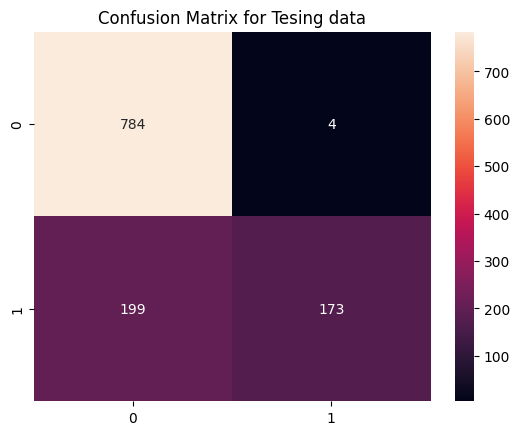

In [40]:
sns.heatmap(dtfr, annot = True, fmt = '.0f')
plt.title("Confusion Matrix for Tesing data")

In [ ]:
# prob_svm = spvc1.predict_proba(x_test)
# prob_svm[:, 1]

In [ ]:
# fpr, tpr, threshold = roc_curve(y_test, prob_svm[:, 1], pos_label = 1)

In [ ]:
# plt.figure(figsize = (7, 7))
# plt.plot(fpr, tpr, color = "orange", label = "ROC curve")
# plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle = '--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate")
# plt.title("Receiver operating characteristic for Support Vector Machine")
# plt.legend(loc = "lower right")
# plt.show()


In [44]:
accuracy_svm = accuracy_score(y_test_svm, spvc1.predict(x_test_svm))
recall_svm = recall_score(y_test_svm, spvc1.predict(x_test_svm))
precision_svm = precision_score(y_test_svm, spvc1.predict(x_test_svm))
f1_svm = f1_score(y_test_svm, spvc1.predict(x_test_svm))

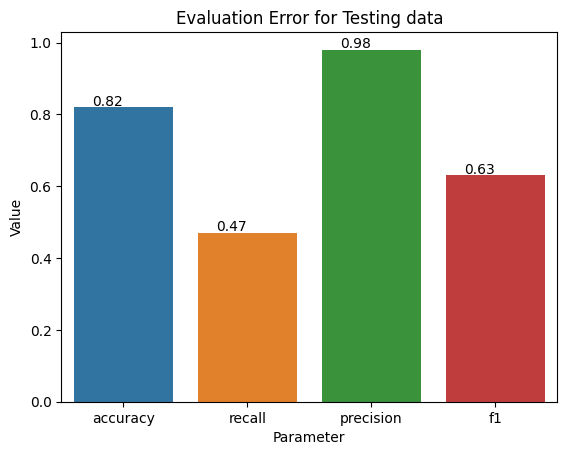

In [45]:
y_values = [accuracy_svm, recall_svm, precision_svm, f1_svm]
for i in range(len(y_values)):
    y_values[i] = round(y_values[i], 2)
x_index = ["accuracy", "recall", "precision", "f1"]
ax = sns.barplot(x = x_index, y = y_values, order = x_index)
labels = list(set(x_index))
for label, p in zip(y_values, ax.patches):
    ax.annotate(label, (p.get_x()+0.15, p.get_height()+0.005))
plt.title("Evaluation Error for Testing data")
plt.xlabel("Parameter")
plt.ylabel("Value")
plt.show()

*1.4.Error for Train*

Text(0.5, 1.0, 'Confusion Matrix for Training data')

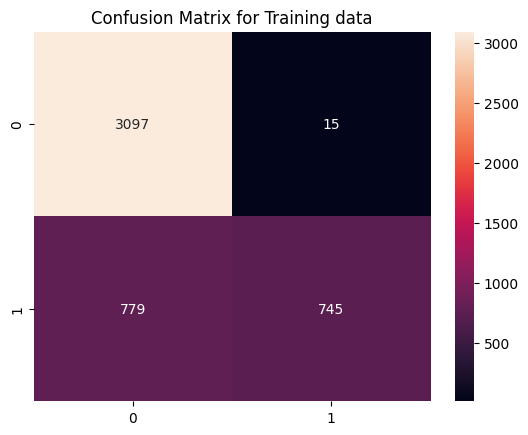

In [46]:
mat_train = confusion_matrix(y_train_svm, spvc1.predict(x_train_svm))
dtfr1 = pd.DataFrame(mat_train)
sns.heatmap(dtfr1, annot = True, fmt = '.0f')
plt.title("Confusion Matrix for Training data")

**2.Naive Bayve**

In [47]:
# from sklearn.naive_bayes import MultinomialNB

*2.1.Data*

In [48]:
# x_train_nb = x_train.copy()
# x_test_nb = x_test.copy()
# y_train_nb = y_train.copy()
# y_test_nb = y_test.copy()

*2.2.Training model*

In [49]:
# naivebay = MultinomialNB()

In [51]:
# naivebay.fit(x_train_nb, y_train_nb)

MultinomialNB()

*2.3.Error*

In [52]:
# mat_confusion_naivebay = confusion_matrix(y_test_nb, naivebay.predict(x_test_nb))
# mat_confusion_naivebay

array([[788,   0],
       [277,  95]], dtype=int64)

<AxesSubplot: >

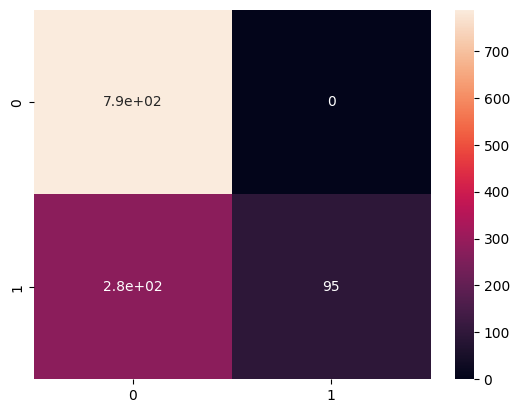

In [53]:
# sns.heatmap(pd.DataFrame(mat_confusion_naivebay), annot = True)

In [54]:
# prob_nb = naivebay.predict_proba(x_test_nb)
# prob_nb

array([[0.68944453, 0.31055547],
       [0.67430348, 0.32569652],
       [0.70083375, 0.29916625],
       ...,
       [0.6779943 , 0.3220057 ],
       [0.35536964, 0.64463036],
       [0.68390542, 0.31609458]])

In [55]:
# fpr1, tpr1, threshold1 = roc_curve(y_test_nb, prob_nb[:, 1], pos_label = 1)

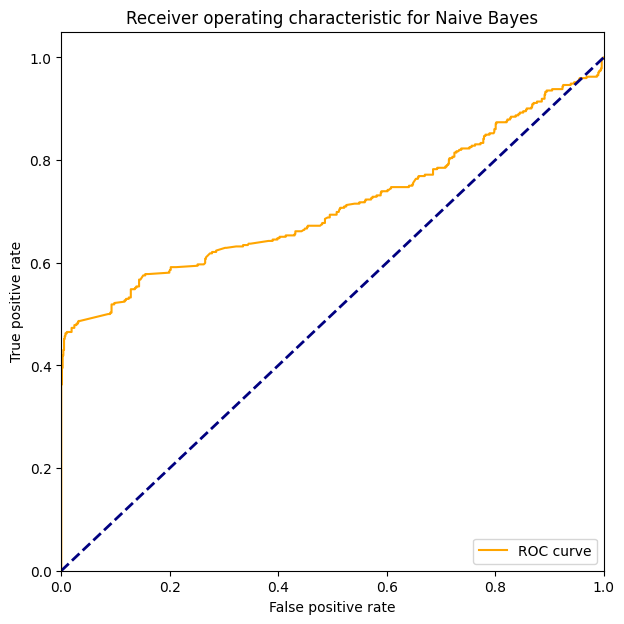

In [56]:
# plt.figure(figsize = (7, 7))
# plt.plot(fpr1, tpr1, color = "orange", label = "ROC curve")
# plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle = '--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate")
# plt.title("Receiver operating characteristic for Naive Bayes")
# plt.legend(loc = "lower right")
# plt.show()

In [57]:
# accuracy_nb = accuracy_score(y_test_nb, naivebay.predict(x_test_nb))
# recall_nb = recall_score(y_test_nb, naivebay.predict(x_test_nb))
# precision_nb = precision_score(y_test_nb, naivebay.predict(x_test_nb))
# f1_nb = f1_score(y_test_nb, naivebay.predict(x_test_nb))

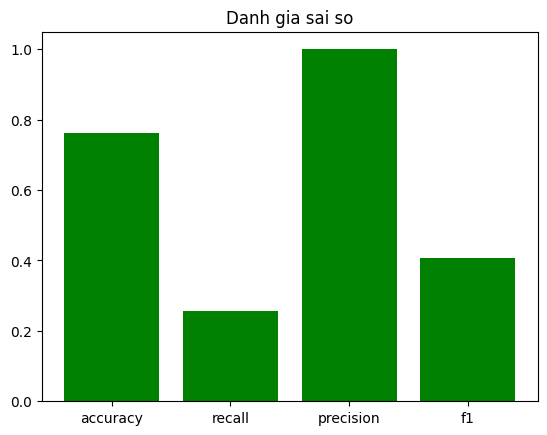

In [58]:
# plt.bar(["accuracy", "recall", "precision", "f1"], [accuracy_nb, recall_nb, precision_nb, f1_nb], color = "green")
# plt.title("Danh gia sai so")
# plt.show()

**IV.Demo**

In [59]:
#need run
text = data["MESSAGE"][5678]

In [60]:
#need run
data["CATEGORY"][5678]

1

In [61]:
#need run
def predict_spam(email_text):
    arr = message_to_count_vector(email_text)
    rs = spvc1.predict(np.array([arr]))[0]
    if rs == 0:
        print("Email is not SPAM")
    else:
        print("Email is SPAM")
    return arr

In [62]:
#need run
print(text)
predict_spam(text)

<HTML><HEAD><TITLE>New Web Technology</TITLE>

<META http-equiv=3DContent-Type content=3D"text/html; charset=3Dwindows-12=

52">

<META content=3D"MSHTML 5.50.4134.600" name=3DGENERATOR></HEAD>

<BODY vLink=3D#c0c0c0 link=3D#c0c0c0 bgColor=3D#EAEAAE leftMargin=3D0><FON=

T 

face=3DMicrosoft, Sans Sarif>

<P>

<CENTER>

<TABLE width=3D560 border=3D0>

  <TBODY>

  <TR>

    <TD align=3Dmiddle><B><FONT color=3D#42426F size=3D6>UNLIMITED WEB CON=

FERENCING</font></b>

      <HR><FONT color=3D#2F2F4F size=3D4>Subscribe to the Web Conference C=

enter for only $40.00 per month!

</FONT>

<br>

<FONT color=3D#42426F size=3D3>(Connects up to 15 participants at a time p=

lus audio charges)</font></TD></TR></TBODY></TABLE><P>

<TABLE width=3D475 border=3D0>

  <TBODY>

  <TR>

    <TD align=3D"left"><FONT color=3D#2F2F4F size=3D3><B>

      <LI>Conduct real-time interactive meetings and presentations<br> ove=

r the Internet 

      <LI>Application sharing

      <LI>Review and revise docume

array([13.,  0.,  0., 40.,  0., 14., 13.,  0.,  9., 14.,  1., 10., 13.,
        3., 48., 26.,  0.,  1.,  3., 28., 25.,  0.,  0.,  0., 13.,  2.,
        0.,  0.,  4., 13., 57.,  3., 25.])

In [63]:
text1 = """Data Science Club FPTU <dsclub.fu@gmail.com> Chào bạn, mình là Dương Thùy Trang, đại diện của ban chủ nhiệm câu lạc bộ FPT Data Science. Thay mặt câu lạc bộ, mình muốn được bày tỏ niềm vui khi nhận được lá đơn đăng ký làm thành viên mới của bạn. Chúng mình rất trân trọng khoảng thời gian bạn đã dành để tìm hiểu về FDS và điền đơn.

Không để bạn phải chờ đợi thêm một phút nào nữa, chúng mình xin thông báo:Ngày phỏng vấn: Thứ 4 và thứ 5 (dự phòng) ngày 9/12-10/12/2020
Ca phỏng vấn: ca 1: 19h30 - 20h15 hoặc ca 2: 20h15 - 21h00
Địa điểm: Phòng 607L, tòa nhà Alpha
Để buổi phỏng vấn diễn ra suôn sẻ, các bạn hãy mặc quần áo thoải mái, ăn cơm tối và chuẩn bị một tinh thần thư giãn. Nếu bạn có tài lẻ như đàn hát, đừng ngần ngại thể hiện cho chúng mình nhé!

Lưu ý: Ứng viên cần CONFIRM ngày phỏng vấn và ca phỏng vấn mình chọn bằng cách reply mail này. Do có giới hạn về không gian nên clb sẽ ưu tiên những người confirm trước.

Cảm ơn các bạn. Hẹn gặp lại!
From FDS with love  <3"""
print(text1)

Data Science Club FPTU <dsclub.fu@gmail.com> Chào bạn, mình là Dương Thùy Trang, đại diện của ban chủ nhiệm câu lạc bộ FPT Data Science. Thay mặt câu lạc bộ, mình muốn được bày tỏ niềm vui khi nhận được lá đơn đăng ký làm thành viên mới của bạn. Chúng mình rất trân trọng khoảng thời gian bạn đã dành để tìm hiểu về FDS và điền đơn.

Không để bạn phải chờ đợi thêm một phút nào nữa, chúng mình xin thông báo:Ngày phỏng vấn: Thứ 4 và thứ 5 (dự phòng) ngày 9/12-10/12/2020
Ca phỏng vấn: ca 1: 19h30 - 20h15 hoặc ca 2: 20h15 - 21h00
Địa điểm: Phòng 607L, tòa nhà Alpha
Để buổi phỏng vấn diễn ra suôn sẻ, các bạn hãy mặc quần áo thoải mái, ăn cơm tối và chuẩn bị một tinh thần thư giãn. Nếu bạn có tài lẻ như đàn hát, đừng ngần ngại thể hiện cho chúng mình nhé!

Lưu ý: Ứng viên cần CONFIRM ngày phỏng vấn và ca phỏng vấn mình chọn bằng cách reply mail này. Do có giới hạn về không gian nên clb sẽ ưu tiên những người confirm trước.

Cảm ơn các bạn. Hẹn gặp lại!
From FDS with love  <3


In [64]:
a = predict_spam(text1)

Email is not SPAM


In [65]:
text2 = """Học tập thông minh <service@smartstudy.vn> Không cần tốn nhiều thời gian để học tập thông minh
Mang đến giải pháp học tập hiệu quả nhất để học tập và chuẩn bị cho mùa thi.
Ở đây chúng tôi có tài khoản giá rẻ: 
Canva pro vĩnh viễn
Quizllet plus 1 tháng
ChatGPT
Quillbot 1 tháng/ 1 năm
Grammarly 1 tháng/ 1 năm
Tặng miễn phí bộ 7300 prompts để học kỹ năng trên ChatGPT, bộ phần mềm Adobe 2023 mới nhất cho Window dành cho tất cả khách hàng mua bất kì sản phẩm nào của chúng tôi."""

In [66]:
b = predict_spam(text2)

Email is not SPAM


In [67]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
text3 = """Hòa Lạc, Phòng Quản Lý Đào Tạo <acad3.hl@fpt.edu.vn> Thân gửi các bạn sinh viên Đại học FPT Hà Nội,


Chèo là loại hình nghệ thuật sân khấu cổ truyền Việt Nam. Với những ngôn từ ví von trong câu hát, nội dung gần gũi, thường nhật; nghệ thuật Chèo đã diễn tả chân thực những sắc thái đa dạng của đời sống con người. Nhờ vậy mà hát chèo luôn được coi là món ăn tinh thần, nghệ thuật sân khấu trong các dịp hội hè đặc sắc.


Chương trình biểu diễn nghệ thuật Chèo mang tên “Tiếng Chèo” thuộc dự án FES-CAMP 4: Thang Âm Việt hứa hẹn mang đến cho học sinh, sinh viên, CBGV đang học tập và làm việc tại Tổ chức Giáo dục FPT không gian trải nghiệm và học tập lý thú về di sản âm nhạc của Việt Nam. 


Tại chương trình, các bạn sẽ được trải nghiệm không gian đặc trưng của Chèo với sự tham gia biểu diễn và chia sẻ của nhiều nghệ sĩ đến từ Nhà hát Chèo Việt Nam. Đặc biệt chương trình có sự tham gia biểu diễn của CBGV và sinh viên ĐH FPT Hà Nội.


ĐỂ LẠI THÔNG TIN THAM GIA TẠI: www.feexp.space/series/thang-am-viet hoặc https://forms.gle/Ez1diyYaDBNbx3pVA


Địa điểm: Sảnh BETA, FPT Edu Hòa Lạc - Khu Công nghệ cao Hòa Lạc Km29 Đại lộ Thăng Long, H. Thạch Thất, TP. Hà Nội (khán giả sẽ ngồi trên chiếu để phù hợp với không gian biểu diễn Chèo)


Thời gian: 19:15 - 21:15, thứ Ba, ngày 07/03/2023

Tại Hà Nội có xe đưa đón 2 chiều cho HSSV FPT Edu di chuyển từ Hà Nội Hòa Lạc tham dự chương trình ngày 07/03/2023


Mọi thắc mắc và yêu cầu hỗ trợ liên quan đến chương trình, xin vui lòng liên hệ với FPT Edu Experience Space qua email: congtachocduong@fe.edu.vn hoặc số điện thoại: 034 866 9124 (Hữu Phát - Mr.).


Thân mến,

Ban Công tác học đường Tổ chức Giáo dục FPT"""

In [70]:
c = predict_spam(text3)

Email is not SPAM


In [90]:
text4 = """Thân gửi bạn,

Phòng Quan hệ doanh nghiệp và Cựu sinh viên xin gửi tới bạn lời mời tham dự chương trình Talk2Win: Nghệ thuật giao tiếp chinh phục đối tác. 

Nội dung chương trình: 
• Lắng nghe chia sẻ từ doanh nhân thành đạt, một nhà lãnh đạo có tầm nhìn và một diễn giả truyền cảm hứng - Mr. Hoàng Nam Tiến - Phó Chủ tịch Hội đồng trường Đại học FPT.
• Nắm được bí quyết giao tiếp thuyết phục đối phương, nhà tuyển dụng
• Chinh phục nghệ thuật đàm phán, dẫn dắt người nghe
• Giao lưu, giải đáp thắc mắc cùng diễn giả
Thông tin chi tiết như sau:
- Link đăng ký: https://forms.gle/BXc4weBxzBKTygAJ7 
- Thời gian: 14h00 - 16h30, Thứ năm, ngày 12/10/2023
- Địa điểm: Hội trường tầng 5 Gamma  Trường Đại học FPT Hà Nội
- Diễn giả: Mr. Hoàng Nam Tiến - Phó Chủ tịch Hội đồng Trường Đại học FPT

Trân trọng,
Phòng QHDN & Cựu sinh viên"""

In [91]:
d = predict_spam(text4)

Email is not SPAM
